# Sepsis Classification Machine Learning Project

## Business Understanding

# Sepsis Overview

Sepsis is a life-threatening condition resulting from the body's extreme response to an infection, leading to widespread inflammation, organ damage, and potential organ failure. Triggered by various infections, sepsis requires prompt medical attention. Symptoms include fever, rapid heart rate, breathing issues, low blood pressure, and altered mental status. Treatment involves antibiotics, intravenous fluids, and supportive care. Early detection is crucial for a better prognosis.

This project focuses on early sepsis detection and classification, a critical aspect of healthcare. Timely identification of sepsis significantly enhances patient outcomes. The goal is to develop a robust machine learning model for sepsis classification and deploy it as a web application using FastAPI, enabling real-time predictions.

### 1.1. Objectives
#### Understand the Data:
Gain a comprehensive understanding of patient data, encompassing health-related features, demographics, and sepsis presence or absence. This knowledge empowers healthcare professionals to make informed decisions about patient care and intervention.

#### Predict Sepsis:
Develop a precise machine learning classification model predicting the likelihood of sepsis based on provided features. Early and accurate sepsis prediction is crucial for timely medical intervention, enhancing patient outcomes.

#### Web Application Integration:
Integrate the trained sepsis classification model into a web application using FastAPI. This application serves as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, aiding in clinical decision-making.

### 1.2. Methodology
To achieve project objectives, follow a structured approach:

#### Data Understanding:
Explore patient data, including age, vital signs, and medical history, to gain insights and identify data quality issues.

#### Data Preparation:
Handle missing values, perform feature engineering, and encode categorical variables as needed to prepare data for machine learning model training.

#### Model Development:
Select and implement a suitable machine learning classification model for sepsis prediction. Train the model on historical patient data to identify patterns indicative of sepsis.

#### Model Evaluation:
Assess model performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation identifies the model's effectiveness in predicting sepsis cases.

#### FastAPI Integration:
Integrate the trained machine learning model into a FastAPI-based web application, offering a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

#### Testing and Validation:
Conduct thorough testing and validation of the web application to ensure reliability and accuracy in real-time sepsis risk assessment.

#### Documentation:
Provide detailed documentation on using the web application, including input requirements and result interpretation.

By following this methodology, the project aims to offer healthcare professionals a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

### Import the necessary modules/packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler,FunctionTransformer

# Handling class imbalance by oversampling
from imblearn.over_sampling import SMOTE 

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

# Other Packages
import warnings
warnings.filterwarnings("ignore")

## Data Understanding

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/Data Analytics/GITHUB/LP_6/Sepsis_Classification_Project_FastAPI_Deployment/Data/Paitients_Files_Train.csv')

df_test = pd.read_csv('C:/Users/Admin/Desktop/Data Analytics/GITHUB/LP_6/Sepsis_Classification_Project_FastAPI_Deployment/Data/Paitients_Files_Test.csv')

### Train Dataset

In [3]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## Understanding the Columns
1. **ID:**
   - Column representing a unique identifier for each patient.

2. **PRG (Plasma Glucose):**
   - Measurement of glucose concentration in the plasma.

3. **PL (Blood Work Result-1):**
   - A numeric result from the first blood work analysis (unit: mu U/ml).

4. **PR (Blood Pressure):**
   - Measurement of blood pressure in millimeters of mercury (mm Hg).

5. **SK (Blood Work Result-2):**
   - A numeric result from the second blood work analysis (unit: mm).

6. **TS (Blood Work Result-3):**
   - A numeric result from the third blood work analysis (unit: mu U/ml).

7. **M11 (Body Mass Index - BMI):**
   - Body mass index calculated as weight in kilograms divided by the square of height in meters.
   (weight in kg/(height in m)^2)

8. **BD2 (Blood Work Result-4):**
   - A numeric result from the fourth blood work analysis (unit: mu U/ml).

9. **Age:**
   - Age of the patient in years.

10. **Insurance:**
    - Binary indicator (Yes/No) representing whether a patient holds a valid insurance card.

11. **Sepsis:**
    - Target variable indicating whether a patient in the Intensive Care Unit (ICU) is predicted to develop sepsis (Positive) or not (Negative). This column is the focus of the classification task.


In [4]:
df.shape

(599, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [8]:
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
df.duplicated().sum()

0

## Hypothesis

**Null Hypothesis (H0):**
"There is no significant age difference between patients with and without sepsis."

**Alternative Hypothesis (H1):**
"There is a significant age difference, indicating certain age groups are more prone to sepsis."

## Research Questions

1. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?

2. Are specific age groups more susceptible to developing sepsis, and can we establish age-related patterns in sepsis occurrence?

3. To what extent does the presence of insurance impact the likelihood of patients developing sepsis, and are there notable associations between insurance status and sepsis occurrence?

4. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?

5. How do various blood parameters relate to the occurrence of sepsis, and can specific bloodwork results be indicative of an increased risk of developing sepsis?

# EDA

### Univariate Analysis

In [10]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [11]:
sep_df=df['Sepssis'].value_counts(normalize=True)
sep_df

Sepssis
Negative    0.652755
Positive    0.347245
Name: proportion, dtype: float64

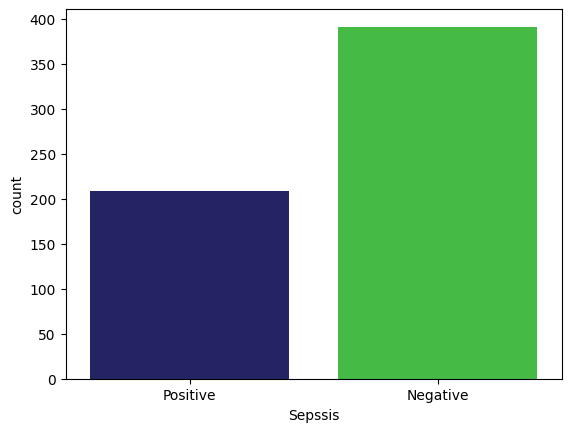

In [12]:
sns.countplot(data=df, x='Sepssis', palette=['midnightblue', 'limegreen'])
plt.show()

__The dataset seems imbalanced, with Negative sepsis cases being more than the positive sepsis cases__

In [13]:
insurance_df=df['Insurance'].value_counts(normalize=True)
insurance_df

Insurance
1    0.686144
0    0.313856
Name: proportion, dtype: float64

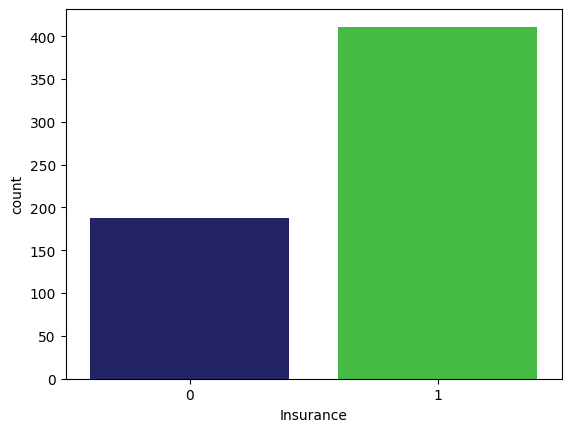

In [14]:
sns.countplot(data=df, x='Insurance', palette=['midnightblue', 'limegreen'])
plt.show()

__Patients with valid health insurance cover are more than those without a valid health insurance cover__

In [15]:
cols = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

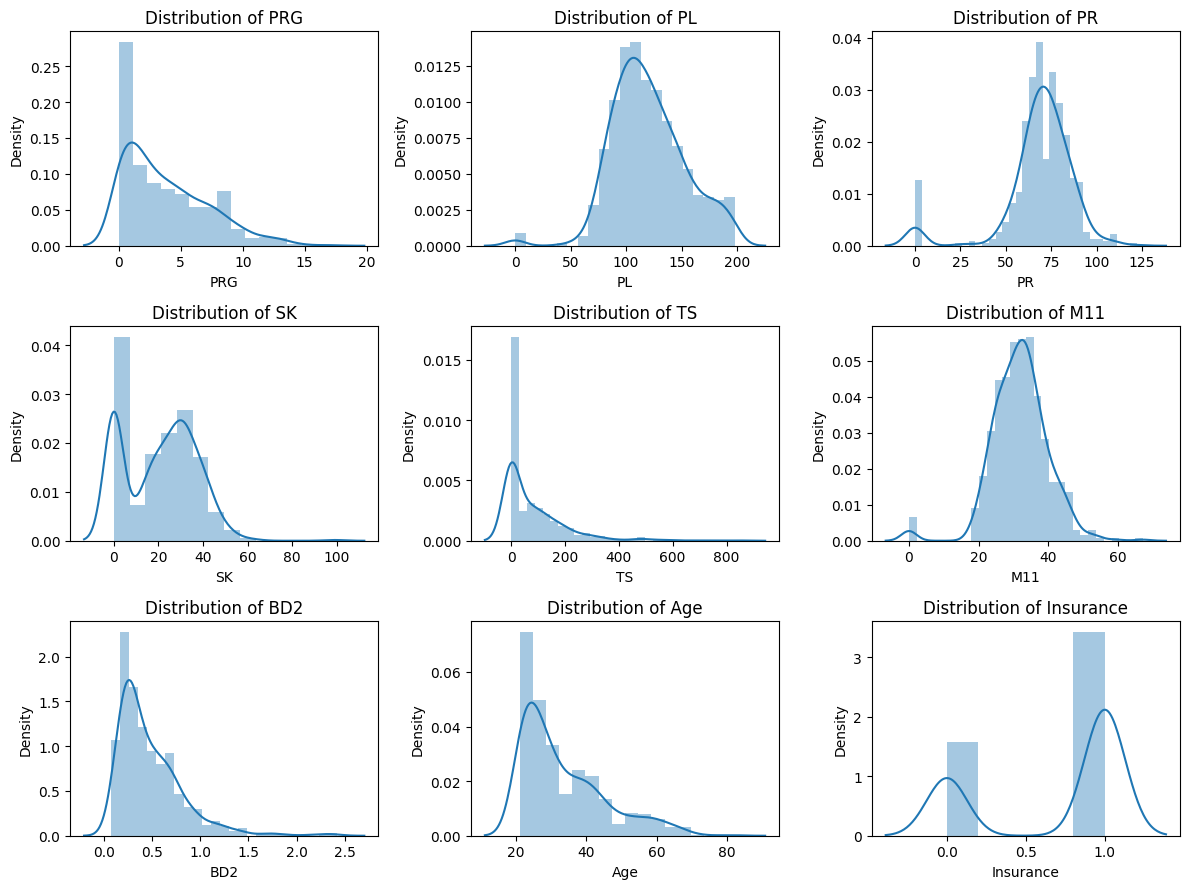

In [16]:
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(cols) + num_cols - 1) // num_cols  # Round up to the nearest integer

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows))

# Plot histograms for specific columns
for i, col in enumerate(cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.distplot(df[col], kde=True,ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


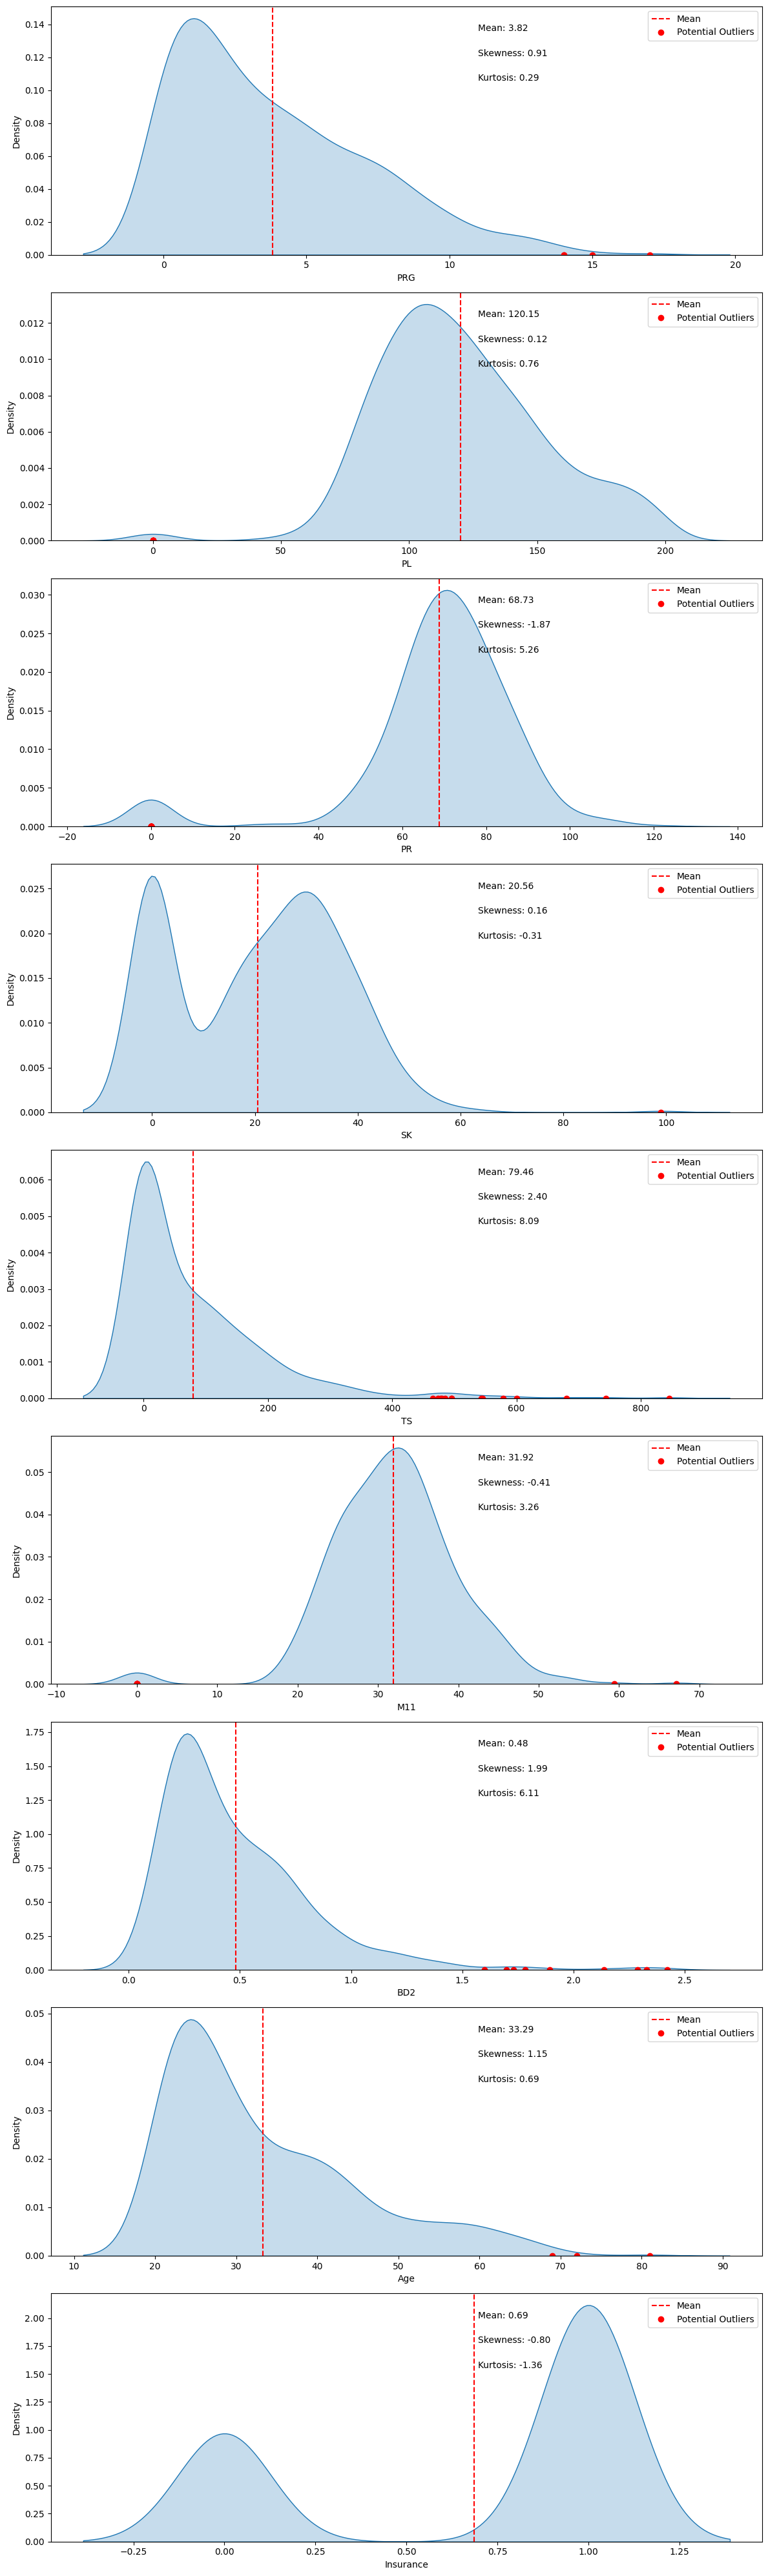

In [17]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols), figsize=(12, 40))
for i, col in enumerate(cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = df[(df[col] > mean_val + 3 * df[col].std()) | (df[col] < mean_val - 3 * df[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()

__Kurtosis__ measures the "tailedness" of a distribution.

__Skewness__ measures the asymmetry of the distribution


1. **PRG (Plasma Glucose):**
   - The KDE plot shows a distribution with more values on the higher side, indicating positive skewness.
   - The plot is platykurtic, meaning it has a flatter peak and lighter tails compared to a normal distribution.

2. **PL (Blood Work Result-1):**
   - The KDE plot suggests a roughly symmetric distribution with an average (mean) value around 120.15.
   - The distribution is mesokurtic, implying a shape similar to a normal distribution.

3. **PR (Blood Pressure):**
   - The KDE plot indicates a negatively skewed distribution with a more peaked shape and possible outliers.

4. **SK (Blood Work Result-2):**
   - The KDE plot suggests a slightly positively skewed distribution with a flatter shape, implying fewer outliers or extreme values.

5. **TS (Blood Work Result-3):**
   - The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails.
   - This means there's a higher frequency of lower values compared to higher values, and there might be more outliers.

6. **M11 (Body Mass Index - BMI):**
   - The KDE plot indicates a slightly negatively skewed distribution with a more peaked shape and heavier tails.
   - This means there's a higher frequency of higher BMI values compared to lower values, and there might be more outliers.

7. **BD2 (Blood Work Result-4):**
   - The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails.
   - This indicates a higher frequency of extreme values or outliers, with the tail extending to the right.

8. **Age :**
- The KDE plot indicates a positively skewed distribution of age, with a higher frequency of younger individuals.
- This suggests that the distribution is more uniform, with a spread of values that doesn't exhibit significant outliers or extreme values. There is a higher concentration of younger individuals, and the tail of the distribution extends to the right, highlighting a prevalence of younger ages compared to older ones.


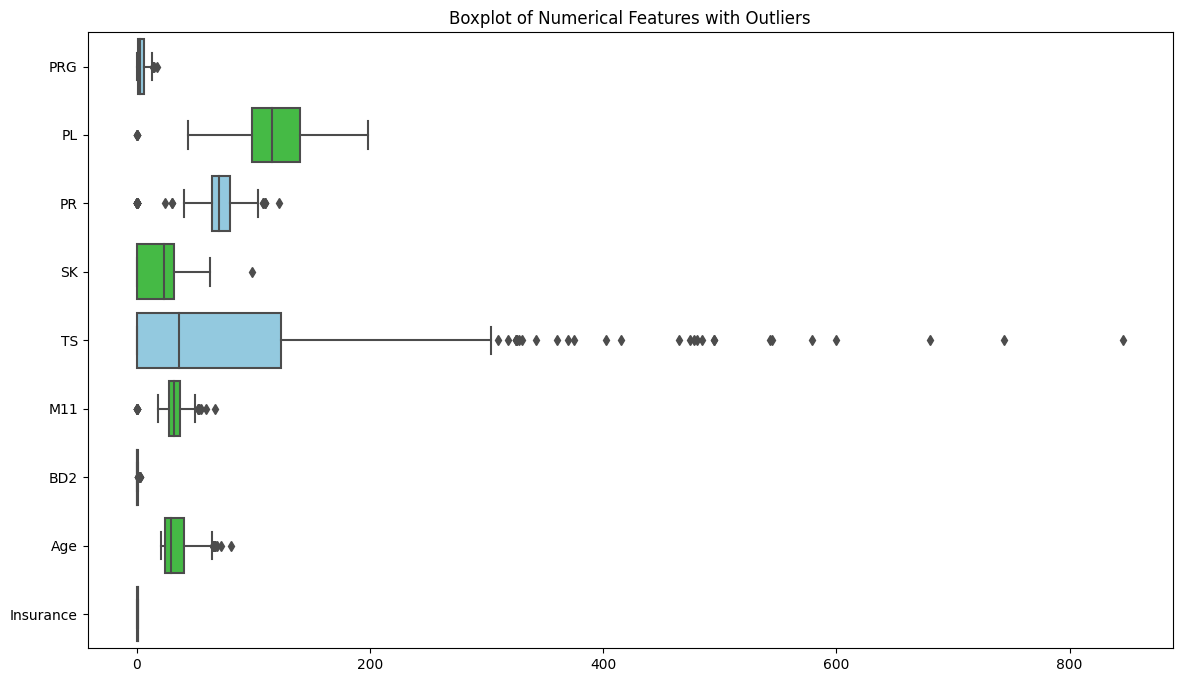

In [18]:
# Create a single boxplot to show outliers
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df[cols], whis=1.5, orient='h', palette=['skyblue', 'limegreen'])
plt.title("Boxplot of Numerical Features with Outliers")
plt.show()

Number of outliers in PRG: 4


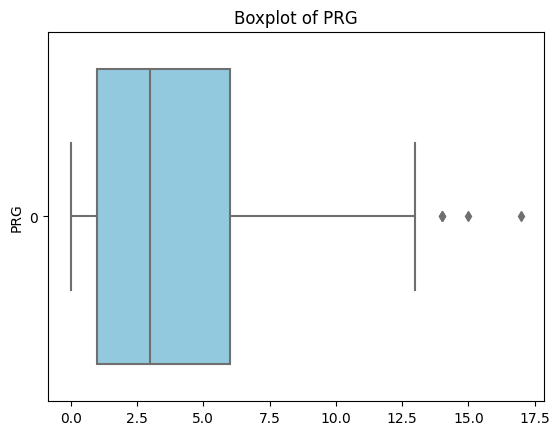

Number of outliers in PL: 0


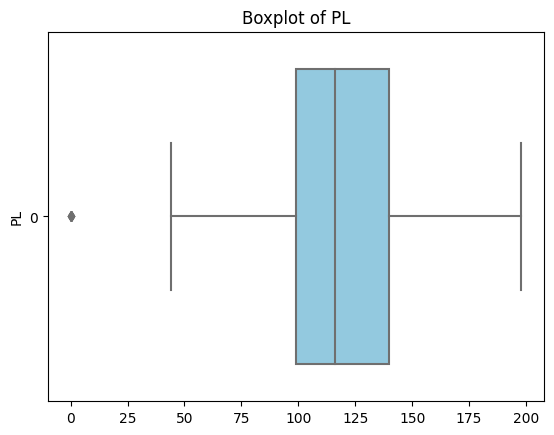

Number of outliers in PR: 6


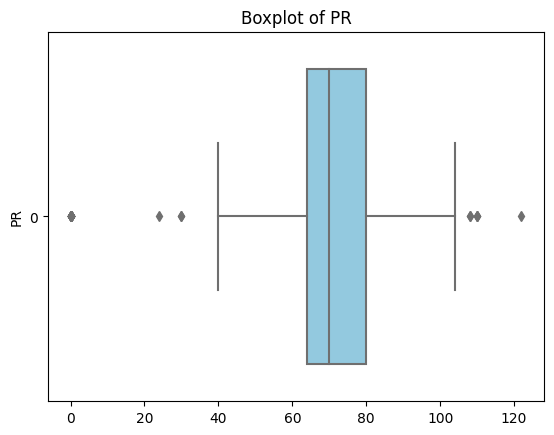

Number of outliers in SK: 1


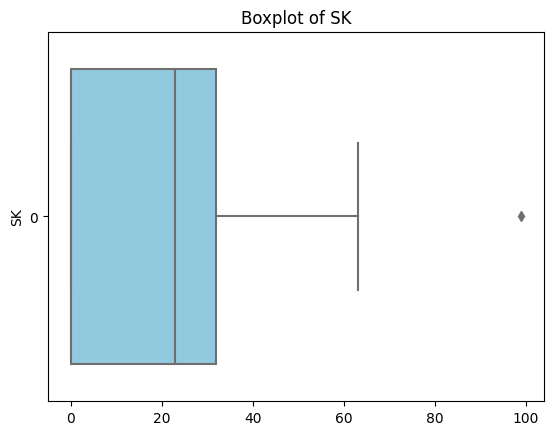

Number of outliers in TS: 28


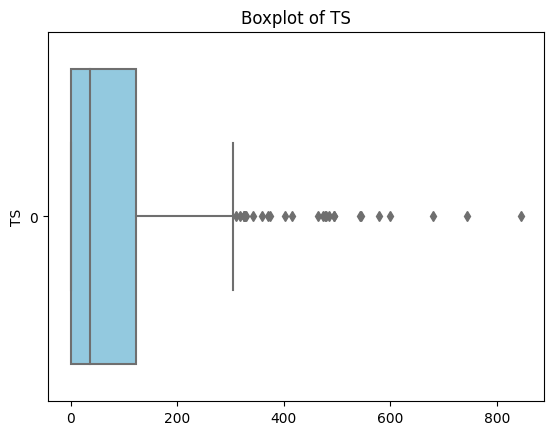

Number of outliers in M11: 7


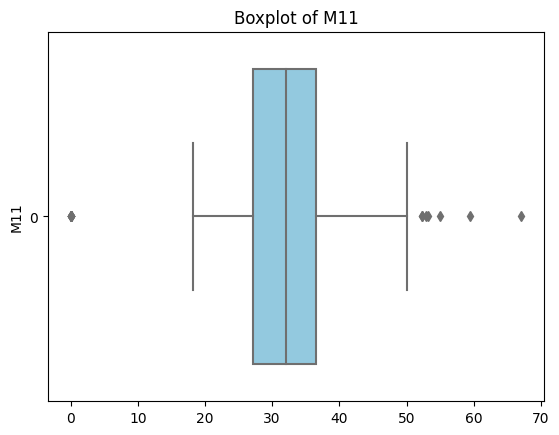

Number of outliers in BD2: 19


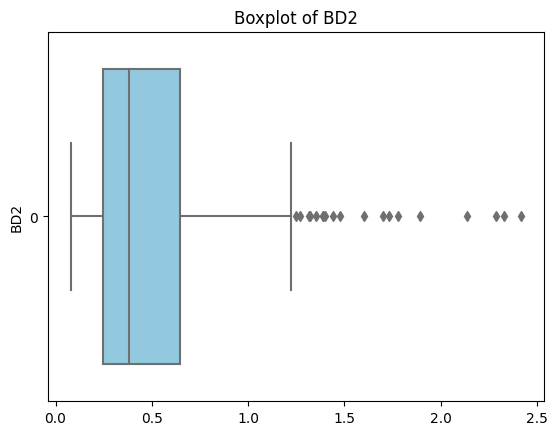

Number of outliers in Age: 12


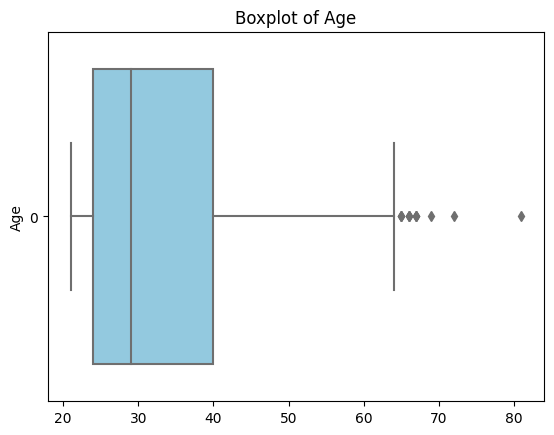

Number of outliers in Insurance: 0


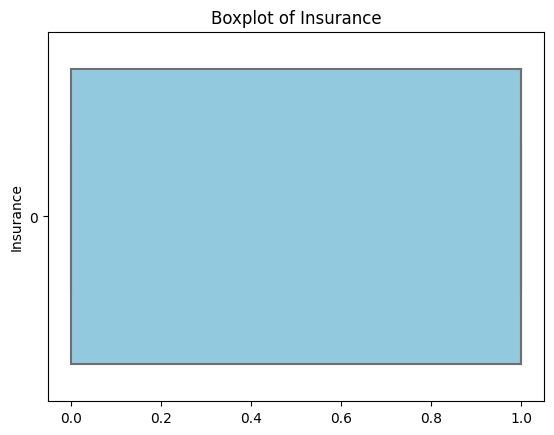

In [19]:
# Iterate over each numerical column
for col in cols:
    # Create a box plot
    sns.boxplot(data = df[col],whis=1.5, orient='h',palette=['skyblue', 'limegreen'])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Get the outliers
    outliers = df[df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))]  # Adjust the outlier threshold if needed

    # Print the number of outliers
    num_outliers = len(outliers)
    print(f"Number of outliers in {col}: {num_outliers}")

    # Show the plot
    plt.show()

## Bivariate Analysis

In [20]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

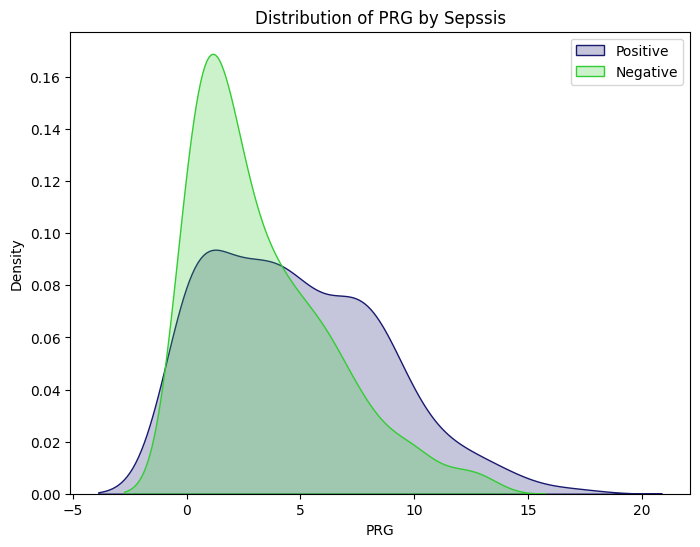

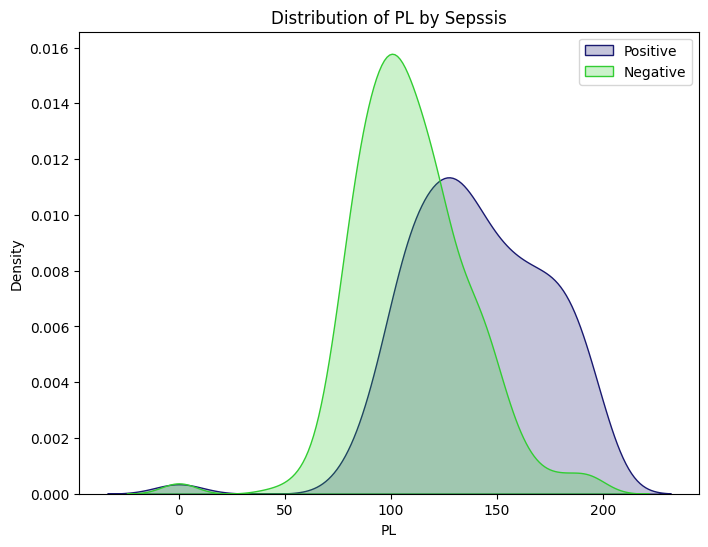

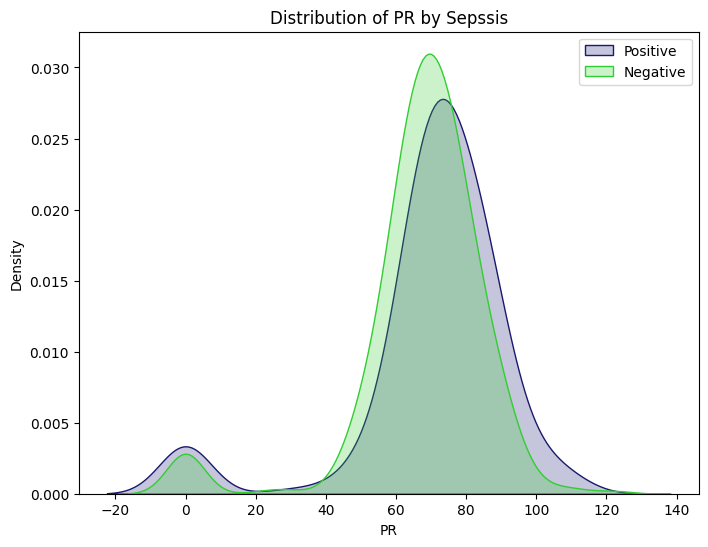

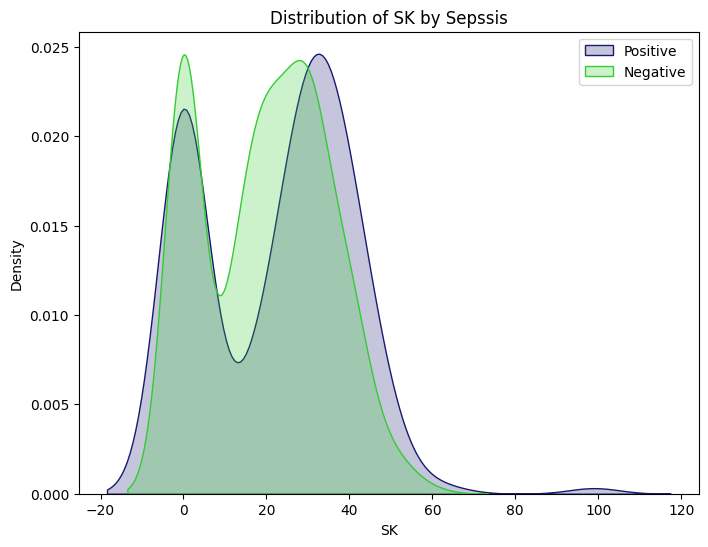

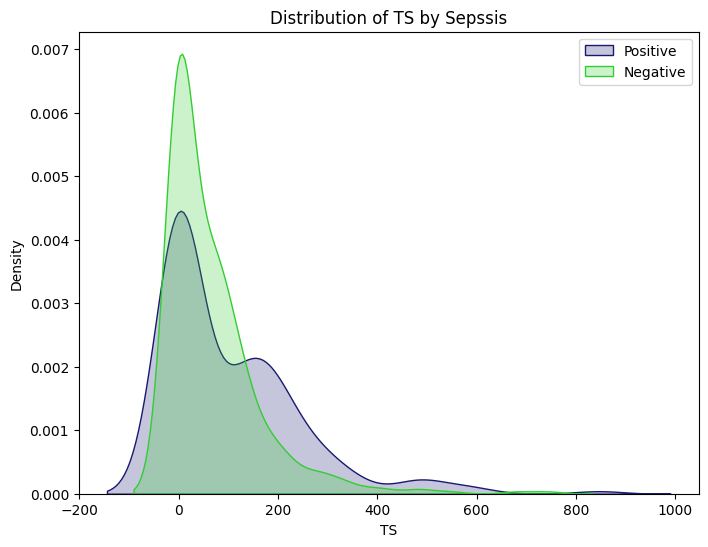

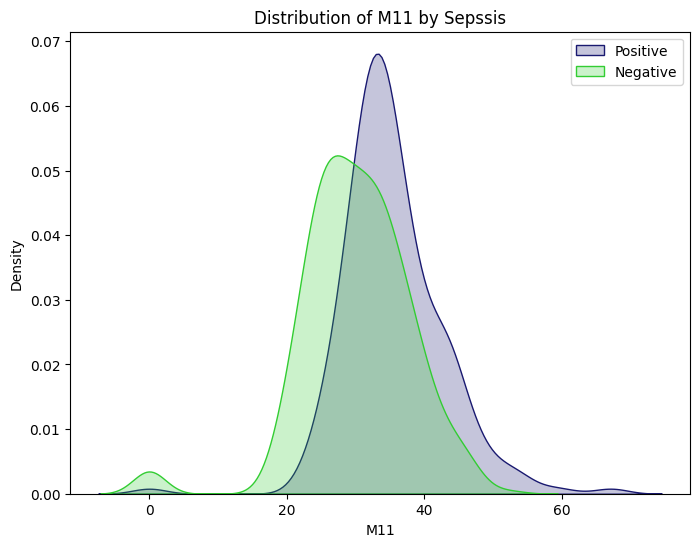

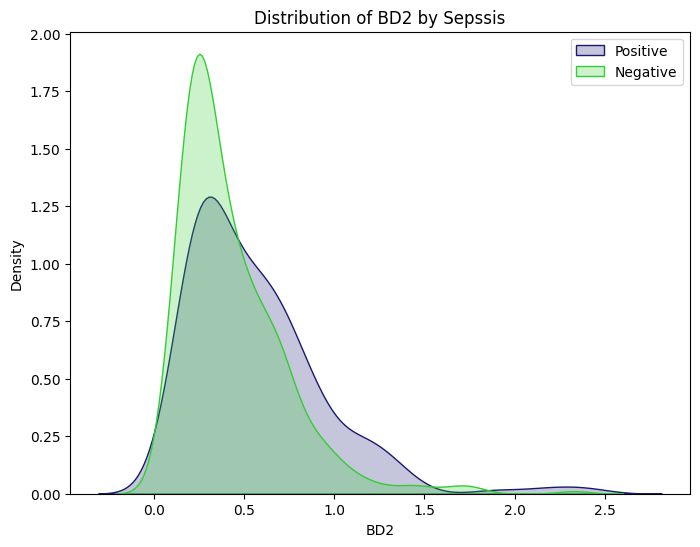

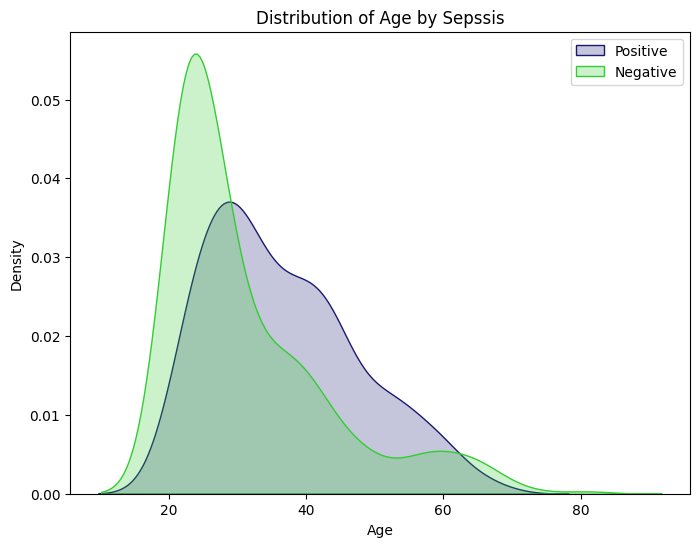

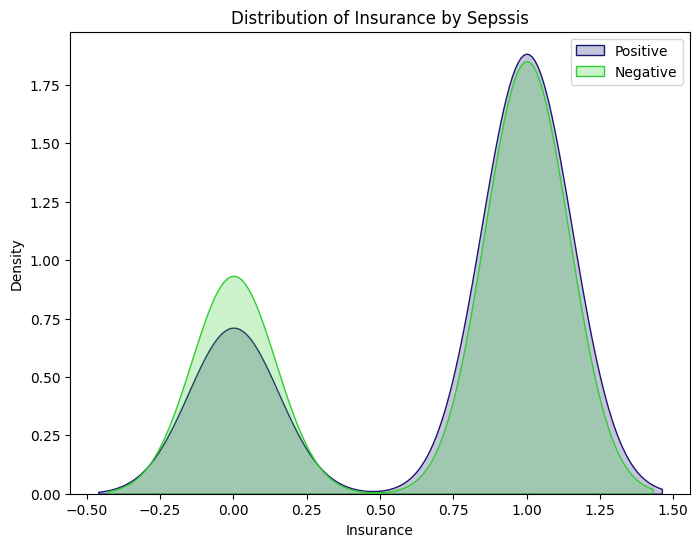

In [21]:
for i in cols:
    plt.figure(figsize=(8, 6))
    
    
    # Separate the data based on gender
    positive_data = df[df['Sepssis'] == 'Positive'][i]
    negative_data = df[df['Sepssis'] == 'Negative'][i]

    # Plot each gender's distribution
    sns.kdeplot(positive_data, shade=True, label='Positive',  color='midnightblue')
    sns.kdeplot(negative_data, shade=True, label='Negative', color='limegreen')

    plt.title(f'Distribution of {i} by Sepssis')
    plt.legend()
    plt.show()

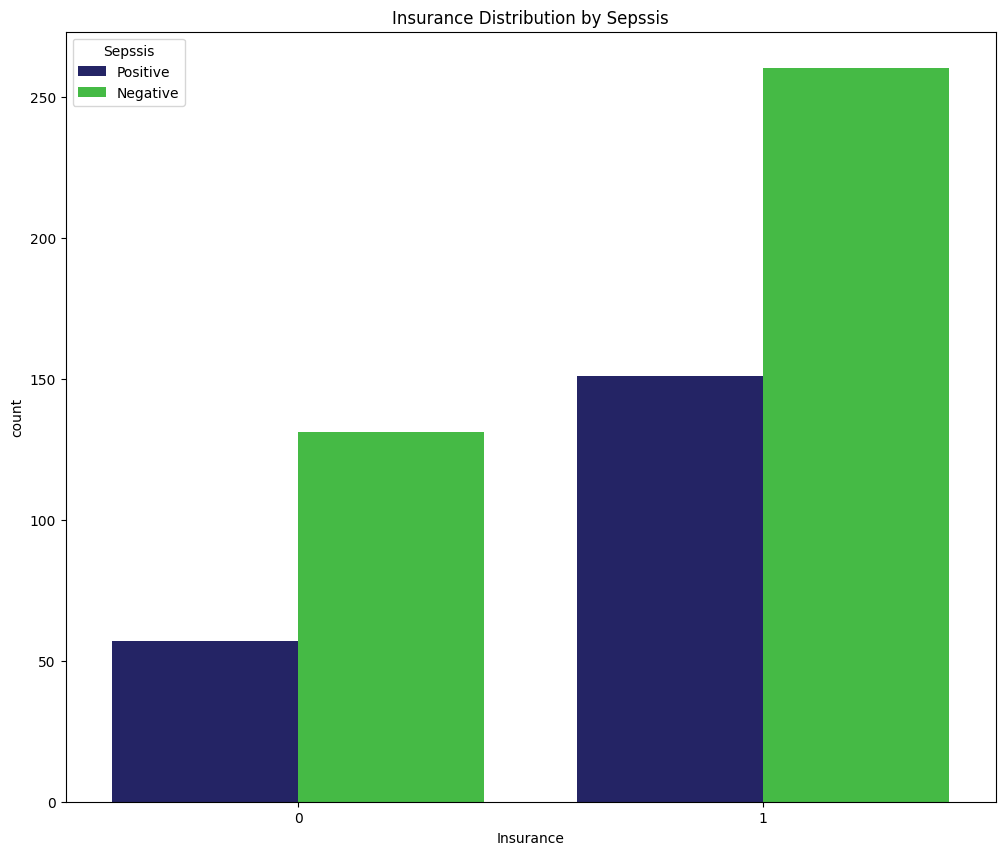

In [22]:
# Analysis for insurance column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Insurance', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Insurance Distribution by Sepssis')
plt.show()

    

### Bivariate Analysis of Age vs Other columns

In [23]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64],
      dtype=int64)

In [24]:
df['Age'].max()

81

In [25]:
df['Age'].min()

21

In [26]:
# Define age bins
age_bins = [20,  40, 60,  80,  100]
age_labels = ["{0} - {1}".format(age_bins[i], age_bins[i + 1] - 1) for i in range(len(age_bins) - 1)]

# Create a new column 'Age Group' in your DataFrame
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the counts of each age group
df['age_group'].value_counts()

age_group
20 - 39    443
40 - 59    129
60 - 79     26
80 - 99      1
Name: count, dtype: int64

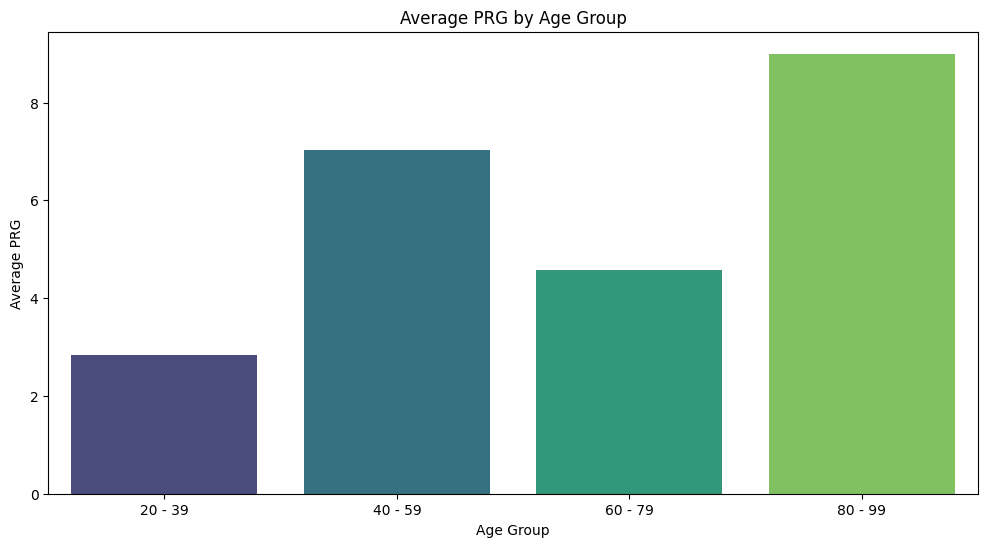

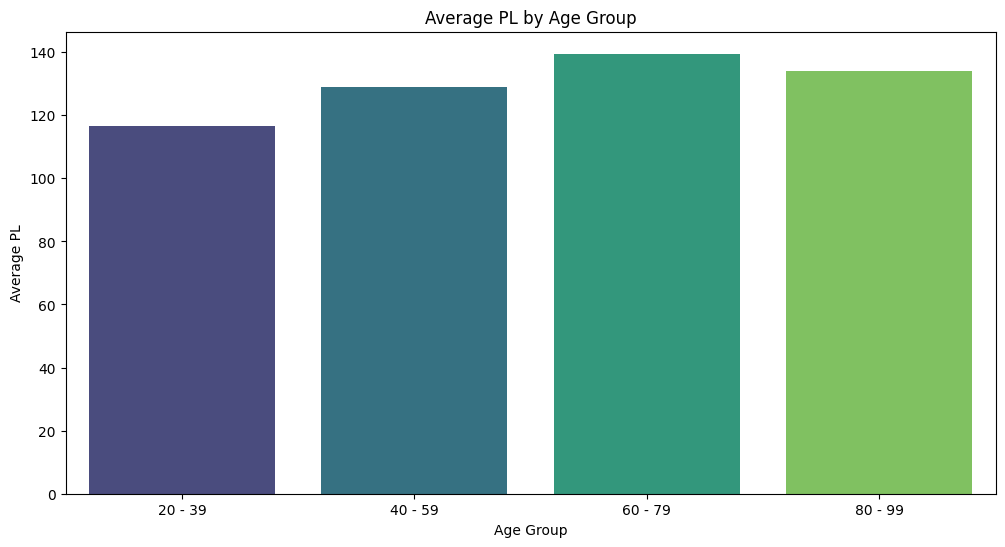

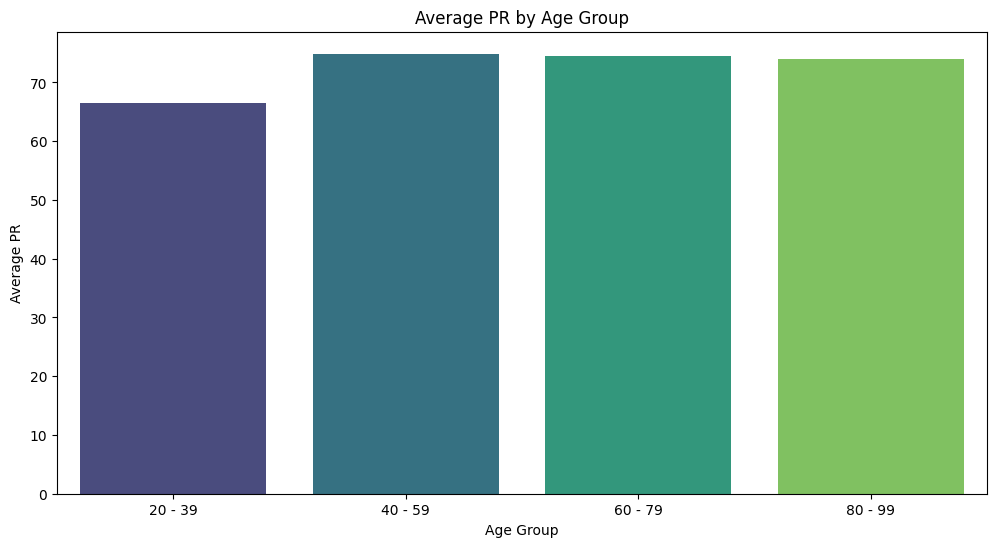

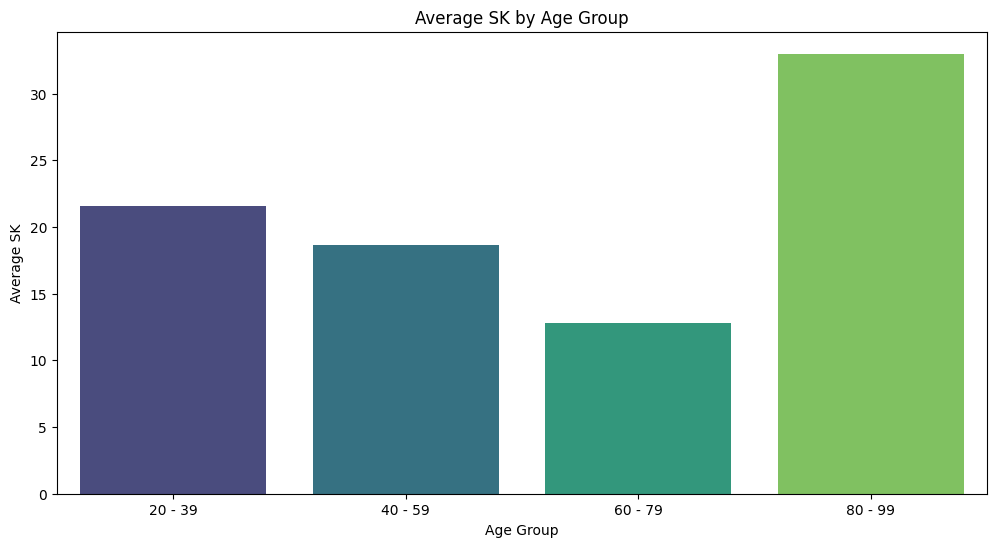

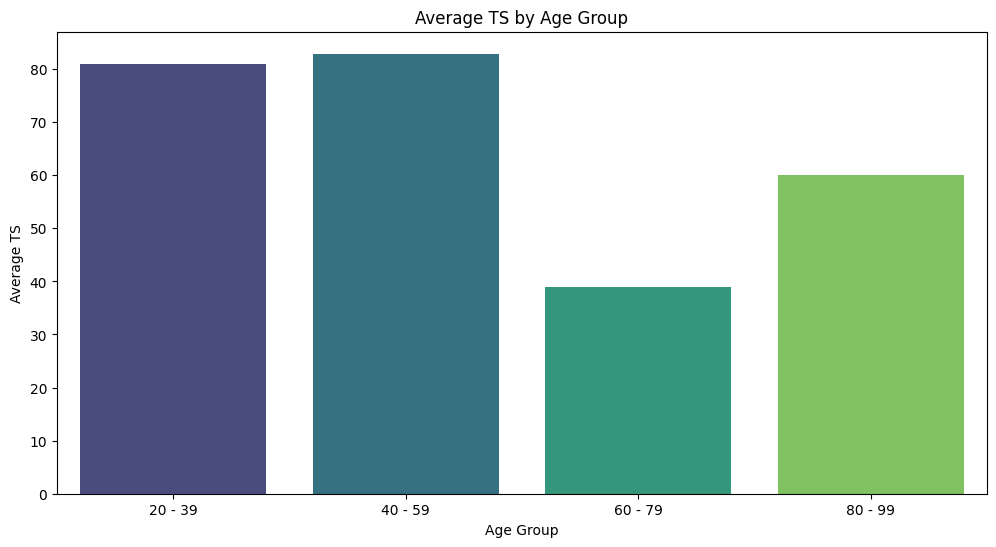

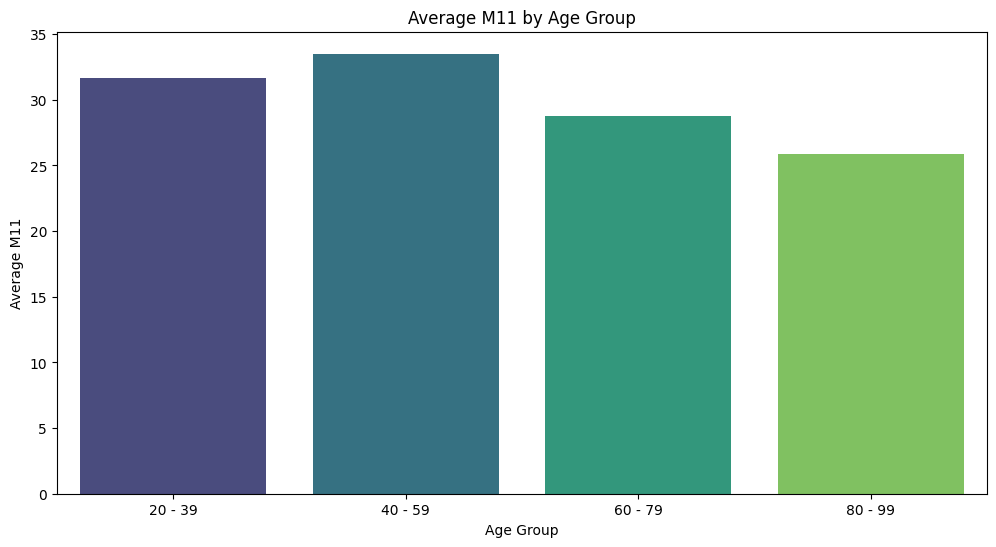

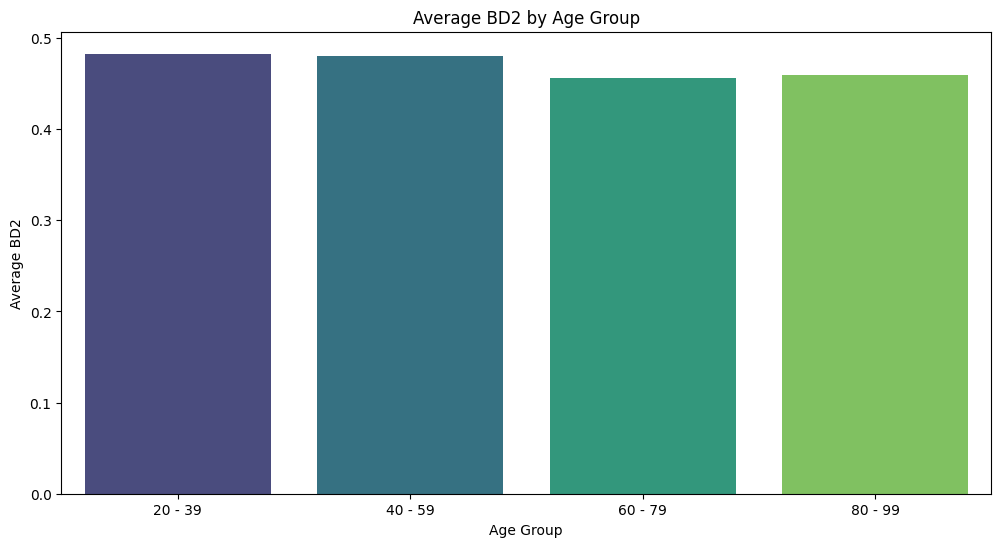

In [27]:
cols_age = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']
# Loop through each column
for col in cols_age:
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='age_group', y=col, palette='viridis', ci=None)
    plt.title(f'Average {col} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(f'Average {col}')
    plt.xticks(rotation=0)
    plt.show()


In [28]:
# Separate positive and negative cases into two DataFrames
positive_df = df[df['Sepssis'] == 'Positive']
negative_df = df[df['Sepssis'] == 'Negative']

# Create DataFrames showing the counts for each age group
sepsis_positive_counts = positive_df['age_group'].value_counts().reset_index()
sepsis_negative_counts = negative_df['age_group'].value_counts().reset_index()
# positive
print("Sepsis Positive Counts:")
sepsis_positive_counts

Sepsis Positive Counts:


,age_group,count
0,20 - 39,130
1,40 - 59,71
2,60 - 79,7
3,80 - 99,0


In [29]:
# negative
print("\nSepsis Negative Counts:")
sepsis_negative_counts


Sepsis Negative Counts:


,age_group,count
0,20 - 39,313
1,40 - 59,58
2,60 - 79,19
3,80 - 99,1


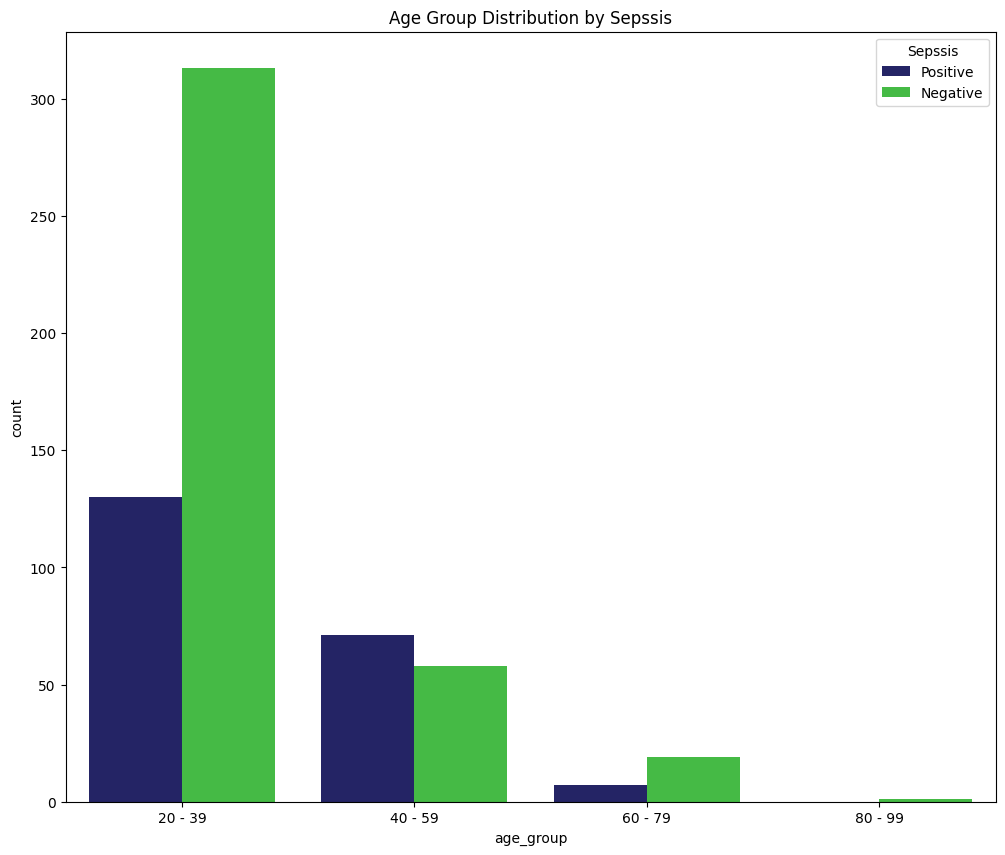

In [30]:
# Analysis for insurance column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='age_group', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Age Group Distribution by Sepssis')
plt.show()

## Multivariate Analysis

In [31]:
# Encoding the target variable
df['Sepssis'] = df['Sepssis'].map({'Negative': 0, 'Positive': 1})

In [32]:
df_corr = df.corr(numeric_only=True)

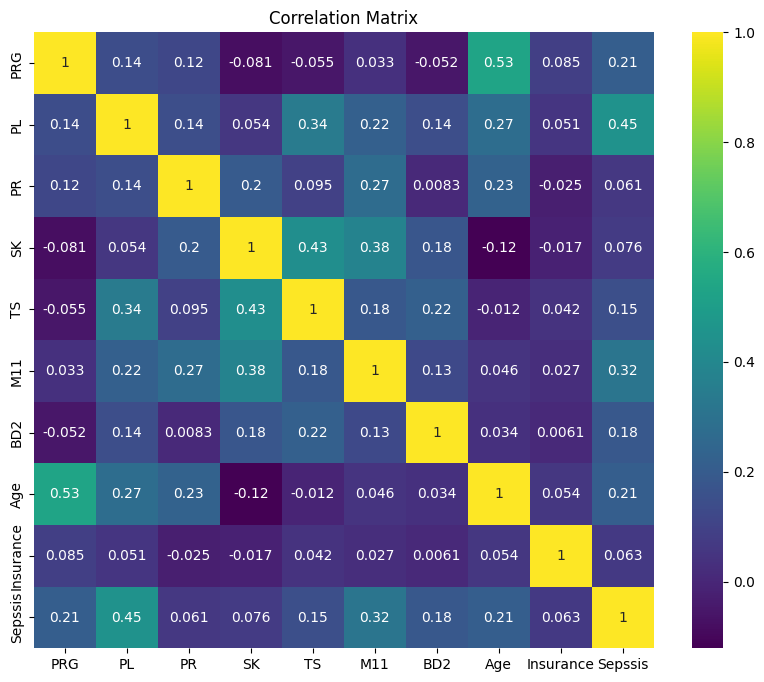

In [33]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

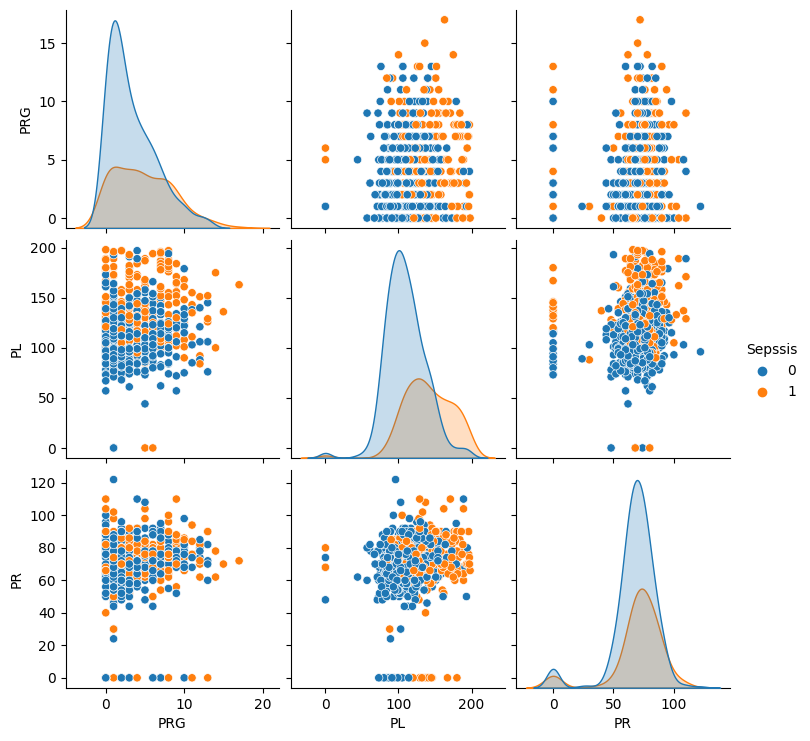

In [34]:
numerical_cols = ['PRG', 'PL', 'PR']
sns.pairplot(data=df, vars=numerical_cols, hue='Sepssis')
plt.show()

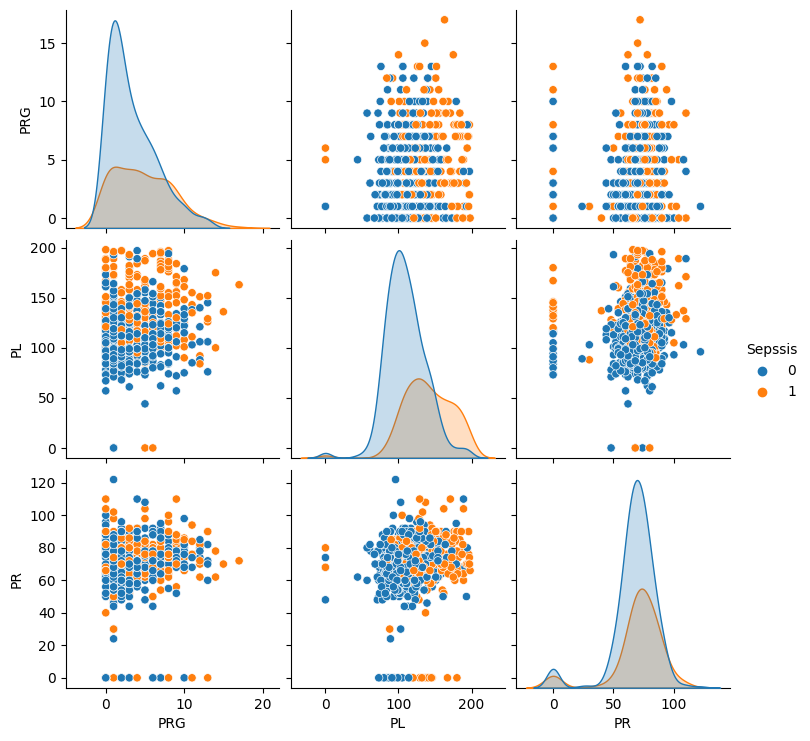

In [35]:
numerical_vars = ['SK', 'TS', 'M11']
sns.pairplot(data=df, vars=numerical_cols, hue='Sepssis')
plt.show()

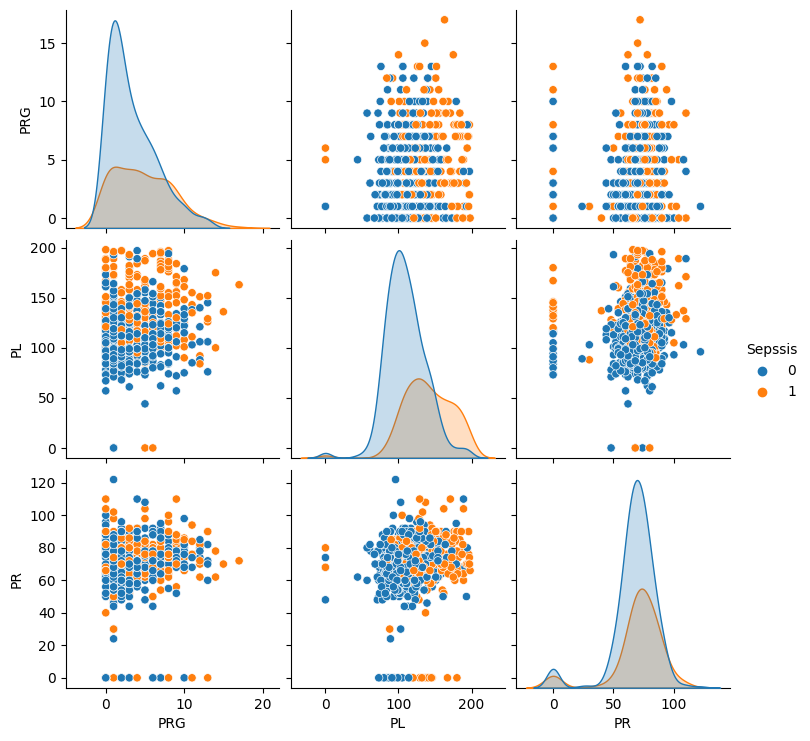

In [36]:
numerical_vars = ['BD2', 'Age', 'Insurance']
sns.pairplot(data=df, vars=numerical_cols, hue='Sepssis')
plt.show()

## Hypothesis

**Null Hypothesis (H0):**
"There is no significant age difference between patients with and without sepsis."

**Alternative Hypothesis (H1):**
"There is a significant age difference, indicating certain age groups are more prone to sepsis."

In [37]:
# Create a contingency table
contingency_table = pd.crosstab(df['age_group'], df['Sepssis'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for statistical significance
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant age difference, indicating certain age groups are more prone to sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant age difference between patients with and without sepsis.")


Chi-square value: 30.370998857482984
P-value: 1.1530368447405031e-06
Reject the null hypothesis. There is a significant age difference, indicating certain age groups are more prone to sepsis.


- The low p-value allows us to reject the null hypothesis, suggesting that there is a significant association between Age Group and the occurrence of sepsis. Therefore, we have evidence to support the alternative hypothesis, indicating that certain age groups may be more prone to sepsis.

- In practical terms, this means that the distribution of sepsis cases is not uniform across different age groups, and age may indeed play a role in susceptibility to sepsis.


## Research Questions

1. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?

2. Are specific age groups more susceptible to developing sepsis, and can we establish age-related patterns in sepsis occurrence?

3. To what extent does the presence of insurance impact the likelihood of patients developing sepsis, and are there notable associations between insurance status and sepsis occurrence?

4. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?

5. How do various blood parameters relate to the occurrence of sepsis, and can specific bloodwork results be indicative of an increased risk of developing sepsis?

1. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?

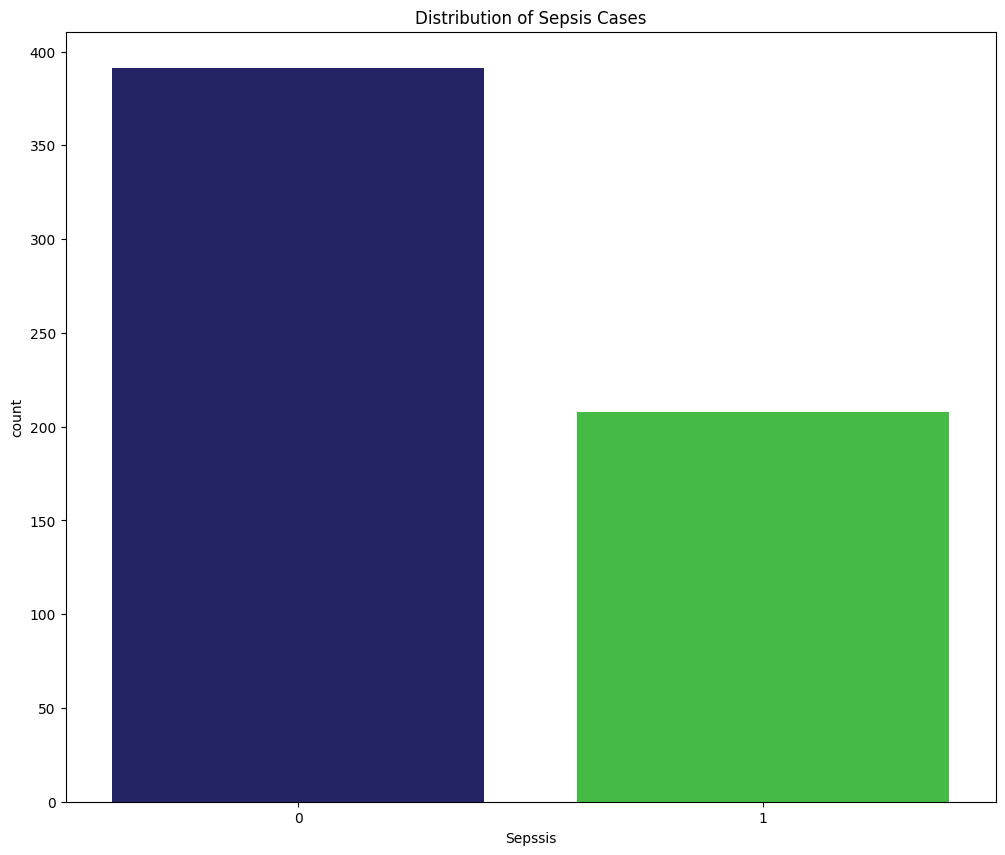

Prevalence of Sepsis: 34.72%


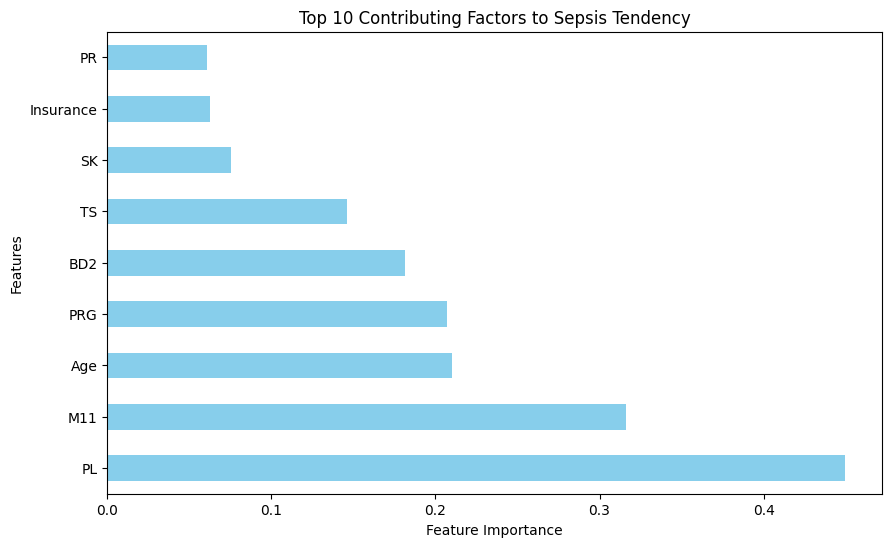

In [38]:
sep_df = df['Sepssis'].value_counts()
prevalence = sep_df[1] / df.shape[0] * 100

plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Sepssis', palette=['midnightblue', 'limegreen'])
plt.title('Distribution of Sepsis Cases')
plt.show()

print(f"Prevalence of Sepsis: {prevalence:.2f}%")

# Identify contributing factors using feature importance
features = df[cols]
target = df['Sepssis']

feature_importance = features.corrwith(target)
top_features = feature_importance.abs().nlargest(10)

# Horizontal bar plot for feature importance
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Contributing Factors to Sepsis Tendency')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


2. Are specific age groups more susceptible to developing sepsis, and can we establish age-related patterns in sepsis occurrence?

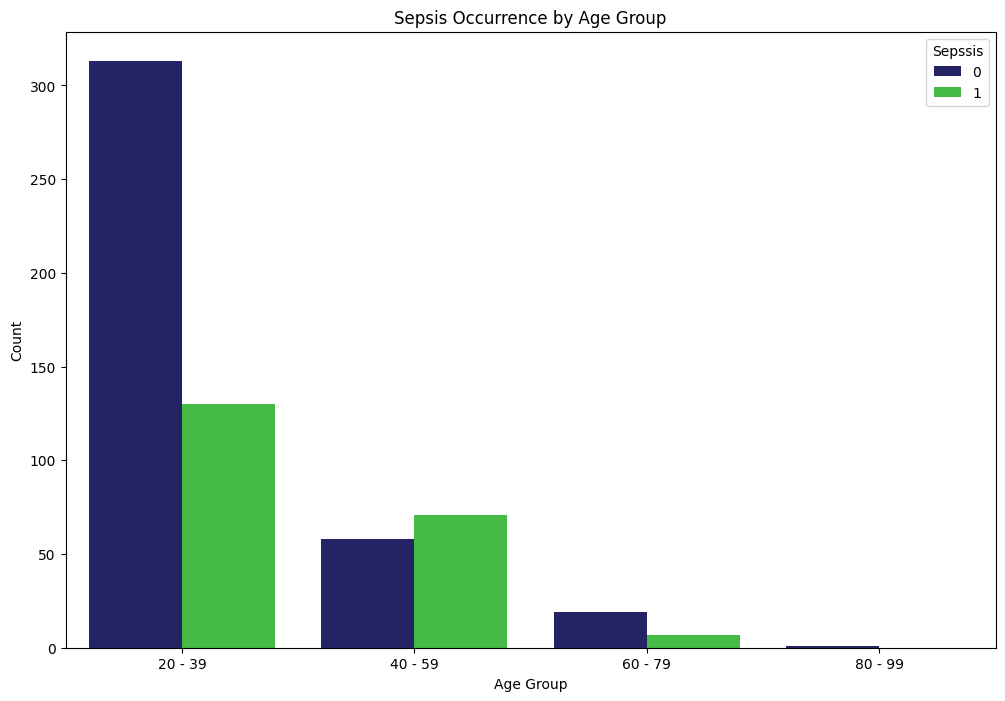

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='Sepssis', palette=['midnightblue', 'limegreen'])
plt.title('Sepsis Occurrence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


3. To what extent does the presence of insurance impact the likelihood of patients developing sepsis, and are there notable associations between insurance status and sepsis occurrence?

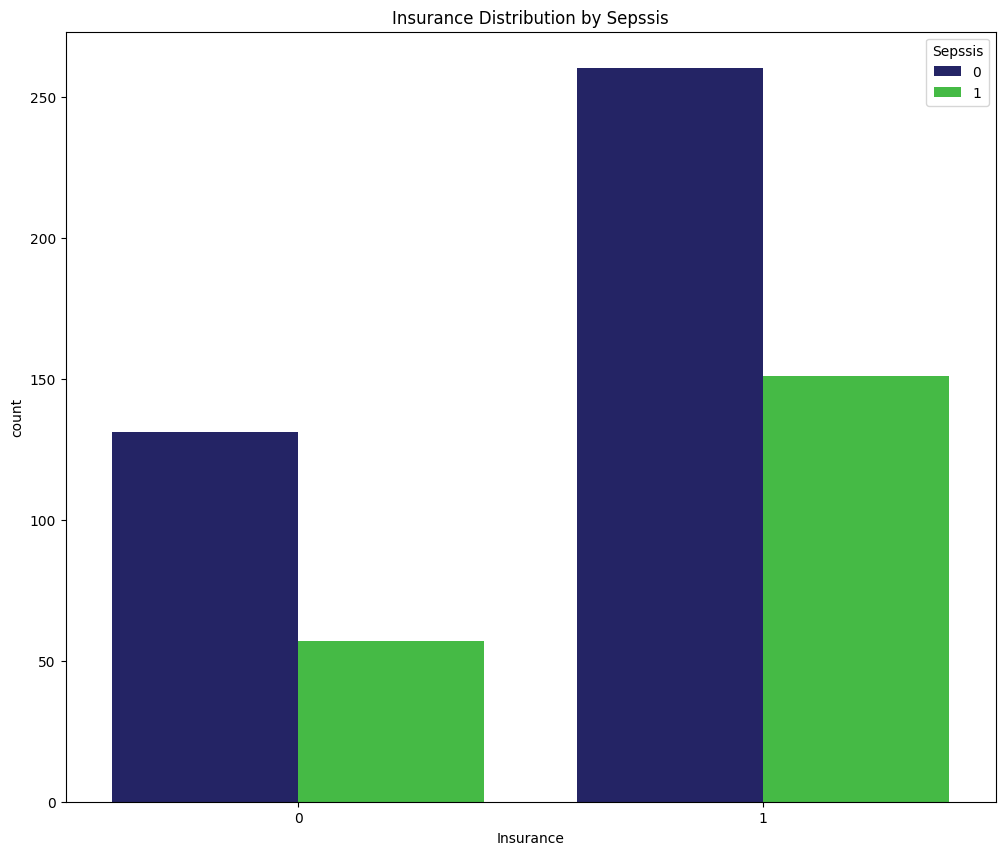

In [40]:
# Analysis for insurance column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Insurance', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Insurance Distribution by Sepssis')
plt.show()


4. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?

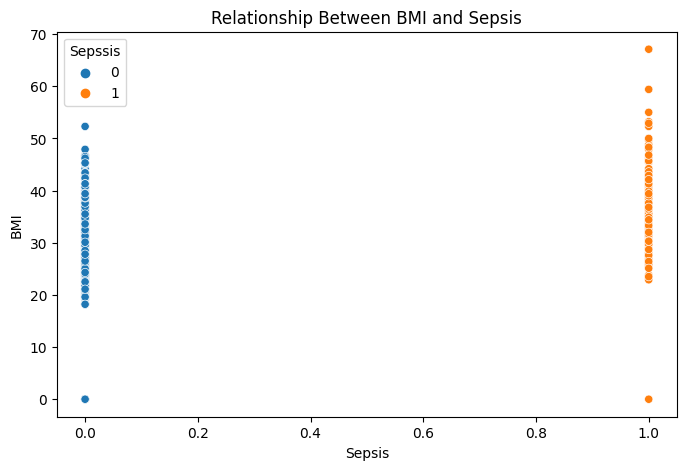

Pearson Correlation between BMI and Sepsis: 0.3158937792685506


In [41]:
# Create a scatterplot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, y='M11', x='Sepssis', hue='Sepssis')
plt.xlabel('Sepsis')
plt.ylabel('BMI')
plt.title('Relationship Between BMI and Sepsis')
plt.show()

# Calculate Pearson correlation between BD2 and age
pearson_correlation = df['M11'].corr(df['Sepssis'], method='pearson')

# Print the Pearson correlation value
print(f"Pearson Correlation between BMI and Sepsis: {pearson_correlation}")

5. How do various blood parameters relate to the occurrence of sepsis, and can specific bloodwork results be indicative of an increased risk of developing sepsis?

 **PL (Blood Work Result-1):**
   - A numeric result from the first blood work analysis (unit: mu U/ml).

 **PR (Blood Pressure):**
   - Measurement of blood pressure in millimeters of mercury (mm Hg).

 **SK (Blood Work Result-2):**
   - A numeric result from the second blood work analysis (unit: mm).

**TS (Blood Work Result-3):**
   - A numeric result from the third blood work analysis (unit: mu U/ml).

 **BD2 (Blood Work Result-4):**
   - A numeric result from the fourth blood work analysis (unit: mu U/ml).
   
 **Sepsis:**
    - Target variable indicating whether a patient in the Intensive Care Unit (ICU) is predicted to develop sepsis (Positive) or not (Negative). This column is the focus of the classification task.


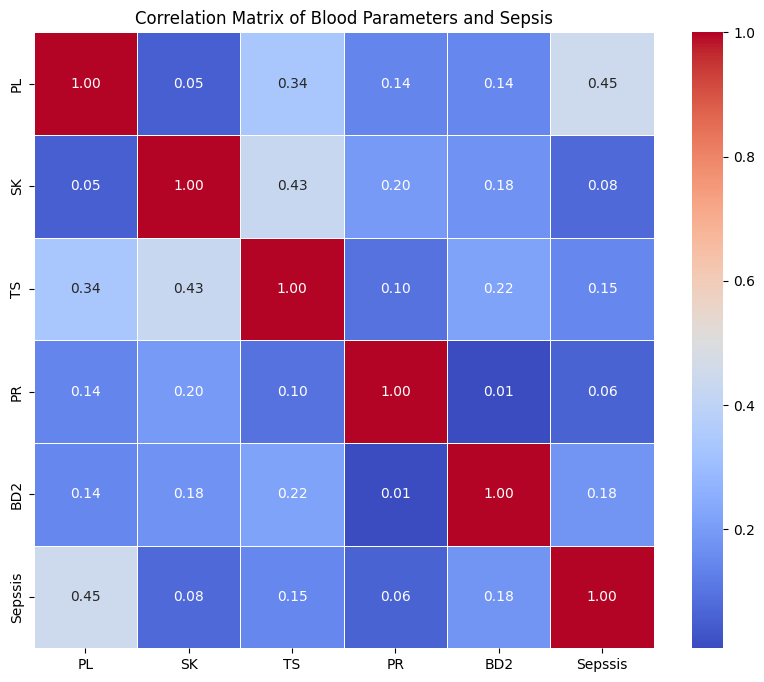

In [42]:
# Select relevant columns for blood parameters and sepsis
blood_columns = ['PL', 'SK', 'TS', 'PR', 'BD2', 'Sepssis']
blood_df = df[blood_columns]
# Calculate the correlation matrix
correlation_matrix = blood_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Blood Parameters and Sepsis')
plt.show()


## Data Preparation

In [43]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'age_group'],
      dtype='object')

In [44]:
df = df.drop(columns=['age_group', 'ID'], axis=1)

In [45]:
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


### Trim the outliers

In [46]:
numerical_features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Creating a copy of the DataFrame to preserve the original data
df_trim = df.copy()

# Calculating the IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Creating a mask to identify outliers
outlier_mask = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Removing outliers
df_trim = df_trim[~outlier_mask.any(axis=1)]

# Display the shape of the cleaned dataset
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_trim.shape)

Original shape: (599, 10)
Shape after removing outliers: (493, 10)


In [47]:
# Define your features (X) and target variable (y)
X = df_trim.drop('Sepssis', axis=1)
y = df_trim['Sepssis']

### Create a pipeline

In [48]:
input_features = X.columns
preprocessor = ColumnTransformer(
    transformers= [
        ('scaler', StandardScaler(),input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

In [49]:
# Check the class distribution in the training set before balancing
print("Class distribution before balancing:")
print(y.value_counts())

Class distribution before balancing:
Sepssis
0    337
1    156
Name: count, dtype: int64


In [50]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
balanced_class_counts = y_train_resampled.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
Sepssis
1    337
0    337
Name: count, dtype: int64


In [52]:
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)


print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (539, 9) (539,)
Shape of the Evaluation Set (X_eval, y_eval): (135, 9) (135,)


## Modelling

### Logistic Regression

In [53]:
log_reg = LogisticRegression()

log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg', log_reg)
])

In [54]:
log_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('log_reg', LogisticRegression())])

In [55]:
log_pred = log_pipeline.predict(X_eval)

In [56]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(log_pred, y_eval))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        74
           1       0.70      0.77      0.73        61

    accuracy                           0.75       135
   macro avg       0.75      0.75      0.75       135
weighted avg       0.75      0.75      0.75       135

